In [1]:
import pandas as pd
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression 
import xgboost as xgb
import toad

In [2]:
def lr_model(x,y,offx,offy,C):
    model = LogisticRegression(C=C,class_weight='balanced')    
    model.fit(x,y)
    
    y_pred = model.predict_proba(x)[:,1]
    fpr_dev,tpr_dev,_ = roc_curve(y,y_pred)
    train_ks = abs(fpr_dev - tpr_dev).max()
    print('train_ks : ',train_ks)
    
    y_pred = model.predict_proba(offx)[:,1]
    fpr_off,tpr_off,_ = roc_curve(offy,y_pred)
    off_ks = abs(fpr_off - tpr_off).max()
    print('off_ks : ',off_ks)
    
    
    from matplotlib import pyplot as plt
    plt.plot(fpr_dev,tpr_dev,label = 'train')
    plt.plot(fpr_off,tpr_off,label = 'off')
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC Curve')
    plt.legend(loc = 'best')
    plt.show()
    
def xgb_model(x,y,offx,offy):
    model = xgb.XGBClassifier(learning_rate=0.05,
                              n_estimators=400,
                              max_depth=3,
                              class_weight='balanced',
                              min_child_weight=1,
                              subsample=1,
                              objective="binary:logistic",
                              nthread=-1,
                              scale_pos_weight=1,
                              random_state=1,
                              n_jobs=-1,
                              reg_lambda=300)
    model.fit(x,y)
    #xgb.plot_importance(model)
    print('>>>>>>>>>')
    y_pred = model.predict_proba(x)[:,1]
    fpr_dev,tpr_dev,_ = roc_curve(y,y_pred)
    train_ks = abs(fpr_dev - tpr_dev).max()
    print('train_ks : ',train_ks)
    
    y_pred = model.predict_proba(offx)[:,1]
    fpr_off,tpr_off,_ = roc_curve(offy,y_pred)
    off_ks = abs(fpr_off - tpr_off).max()
    print('off_ks : ',off_ks)
    
    
    from matplotlib import pyplot as plt
    plt.plot(fpr_dev,tpr_dev,label = 'train')
    plt.plot(fpr_off,tpr_off,label = 'off')
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC Curve')
    plt.legend(loc = 'best')
    plt.show()

In [3]:
#加载数据
path = 'E:/课程资料/集训营/保险赔付模型/MZH/data/'

dev = pd.read_csv(path+"dev_raw_data_special_woe_trt.csv",engine='python',index_col=False)
off = pd.read_csv(path+"off_raw_data_special_woe_trt.csv",engine='python',index_col=False)

dev = dev[dev.index % 2 < 1]
off = off[off.index % 2 < 1]

dev['type'] = 'dev'
off['type'] = 'off'

In [4]:
ex_lis = ['bg_order_no_vouch','bg_result_compensate','weight','type']

In [5]:
ft_lis = ['sj_vouch_60days_cnt',
 'hz_avg_cargo_call_times_last30d_rate',
 'sj_vouch_60days',
 'sj_view_30days_cnt',
 'sj_plate_number_woe',
 'hz_90_days_cnt_compensate_rate',
 'sj_vouch_90days_cnt',
 'sj_view_14days',
 'sj_view_14days_cnt',
 'sj_view_30days',
 'sj_view_60days',
 'sj_bank_cards',
 'sj_vip_fee_count',
 'sj_etc_duration',
 'sj_etc_charge_times_a',
 'sj_etc_charge_amount_a',
 'sj_etcdst_30days_cnts',
 'sj_etcdst_30days_amount',
 'sj_withe_30day_cnt',
 'sj_total_credit_time',
 'sj_bank_auth_days',
 'sj_loan_7cnts',
 'sj_loan_7amounts',
 'sj_all_loan_cnts',
 'sj_all_loan_amounts',
 'sj_repay_7cnts',
 'sj_repay_7amounts',
 'sj_all_repay_cnts',
 'sj_all_repay_amounts',
 'sj_loan_30amounts',
 'sj_cash_30day_cnts',
 'sj_freeinterest_30day_cnts',
 'sj_cash_all_cnts',
 'sj_freeinterest_all_cnts',
 'sj_discount_30day_cnts',
 'sj_discount_all_cnts',
 'sj_etcconsum_1day_cnts',
 'sj_etcconsum_30day_cnts',
 'sj_etcconsum_all_cnts',
 'sj_etcconsum_1day_amount',
 'sj_etcconsum_30day_amount',
 'sj_etc_balance',
 'sj_vouch_30days',
 'sj_vouch_30days_cnt',
 'sj_vouch_90days',
 'sj_gas_last_first_day',
 'sj_total_gas_amt',
 'sj_late_28_gas_amt',
 'si_avg_gas_amt',
 'si_avg_28_gas_amt',
 'si_max_gas_amt',
 'si_total_gas_cnt',
 'si_late_28_gas_cnt',
 'si_day_avg_gas_cnt',
 'si_total_oil_mass',
 'si_late_28_oil_mass',
 'si_avg_gas_oil_mass',
 'si_avg_28_gas_oil_mass',
 'si_total_gross_income',
 'si_late_28_gross_income',
 'si_avg_gross_income',
 'si_avg_28_gross_income',
 'si_refund_order_cnt',
 'si_zh_gas_cnt',
 'si_kp_gas_cnt',
 'si_qz_gas_cnt',
 'si_my_gas_cnt',
 'si_qt_gas_cnt',
 'si_coupon_amt',
 'si_last_365_gas_cnt',
 'si_dau1_30d',
 'si_late_60_pau_gas_cnt',
 'si_total_prize_price',
 'si_no_user_prize_price',
 'si_outdate_prize_price',
 'hz_domain_id',
 'hz_30_days_cnt_cargo_fis',
 'hz_30_days_cnt_cargo_fis_amt',
 'hz_30_days_cnt_cargo_compensate',
 'hz_30_days_cnt_compensate_suceess',
 'hz_30_days_cnt_vouch_consignor',
 'hz_30_days_cnt_compensate_rate',
 'hz_30_days_cnt_compensate_suceess_rate',
 'hz_60_days_cnt_cargo_fis',
 'hz_60_days_cnt_cargo_fis_amt',
 'hz_60_days_cnt_compensate_suceess',
 'hz_60_days_cnt_cargo',
 'hz_60_days_cnt_vouch_consignor',
 'hz_60_days_cnt_compensate_rate',
 'hz_60_days_cnt_compensate_suceess_rate',
 'hz_90_days_cnt_cargo_fis',
 'hz_90_days_cnt_cargo_fis_amt',
 'hz_90_days_cnt_compensate_suceess',
 'hz_90_days_cnt_cargo',
 'hz_90_days_cnt_vouch_consignor',
 'hz_90_days_cnt_compensate_suceess_rate',
 'hz_vehicle_type_name_woe',
 'sj_30day_auth_woe',
 'sj_30day_register_woe',
 'sj_7day_auth_woe',
 'sj_7day_register_woe',
 'sj_card_name_woe',
 'sj_etc_open_woe',
 'sj_vehicle_type_woe',
 'sj_vip_type_woe',
 'sj_p_cargo_truck_type_woe',
 'sj_plate_province_name_woe']

In [6]:
dev = dev[ft_lis+ex_lis]
off = off[ft_lis+ex_lis]

data = pd.concat([dev,off],join='inner')

In [7]:
"""
    EDA
    探索性数据分析
    同时处理数值型和字符型
"""
a = toad.detector.detect(data)
a

,type,size,missing,unique,mean_or_top1,std_or_top2,min_or_top3,1%_or_top4,10%_or_top5,50%_or_bottom5,75%_or_bottom4,90%_or_bottom3,99%_or_bottom2,max_or_bottom1
sj_vouch_60days_cnt,float64,149703,0.00%,34,-12.2262,41.3567,-100.000000,-1.000000e+02,-1.000000e+02,3.000000e+00,8.000000e+00,1.500000e+01,32,32
hz_avg_cargo_call_times_last30d_rate,float64,149703,0.00%,58550,7.33319,4.36538,0.000000,0.000000e+00,3.270540e+00,6.333300e+00,8.987100e+00,1.258138e+01,25.386,27
sj_vouch_60days,float64,149703,0.00%,28,-12.7963,40.964,-100.000000,-1.000000e+02,-1.000000e+02,3.000000e+00,7.000000e+00,1.300000e+01,26,26
sj_view_30days_cnt,float64,149703,0.00%,3294,533.87,676.503,-100.000000,-1.000000e+02,-1.000000e+02,3.280000e+02,7.660000e+02,1.416000e+03,3291.98,3370
sj_plate_number_woe,float64,149703,0.00%,8,0.039088,0.289364,-0.424011,-4.240110e-01,-4.240110e-01,-3.374900e-02,3.047290e-01,3.047290e-01,0.578169,0.578169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sj_plate_province_name_woe,float64,149703,0.00%,9,0.031495,0.269944,-0.283258,-2.832580e-01,-2.366200e-01,-5.828500e-02,2.924880e-01,5.653520e-01,0.565352,0.565352
bg_order_no_vouch,float64,149703,0.00%,6,2.00529e+24,1.60508e+23,-100.000000,2.018060e+24,2.018060e+24,2.018080e+24,2.018090e+24,2.018090e+24,2.02e+24,2.02e+24
bg_result_compensate,int64,149703,0.00%,2,0.0400192,0.196005,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1,1
weight,float64,149703,0.00%,2,2.43997,0.294007,1.000000,1.000000e+00,2.500000e+00,2.500000e+00,2.500000e+00,2.500000e+00,2.5,2.5


In [8]:
"""
    特征筛选
    empty：缺失率上限
    iv：信息量
    corr：相关系数
    return_drop：返回删除特征
    exclude：不参与筛选的变量名
"""
dev_slct1, drop_lst= toad.selection.select(dev,dev['bg_result_compensate'], empty = 0.7, 
                                           iv = 0.02, corr = 0.85, return_drop=True, exclude=ex_lis)
print("keep:",dev_slct1.shape[1],
      "drop empty:",len(drop_lst['empty']),
      "drop iv:",len(drop_lst['iv']),
      "drop corr:",len(drop_lst['corr']))

keep: 31 drop empty: 0 drop iv: 50 drop corr: 30


In [9]:
dev_slct2, drop_lst= toad.selection.select(dev_slct1,dev_slct1['bg_result_compensate'], empty = 0.5, 
                                           iv = 0.02, corr = 0.85, return_drop=True, exclude=ex_lis)
print("keep:",dev_slct2.shape[1],
      "drop empty:",len(drop_lst['empty']),
      "drop iv:",len(drop_lst['iv']),
      "drop corr:",len(drop_lst['corr']))

keep: 31 drop empty: 0 drop iv: 0 drop corr: 0


In [10]:
"""
    先找到分箱的阈值
    分箱阈值的方法（method） 包括：'chi','dt','quantile','step','kmeans'
    利用分箱阈值进行粗分箱
    查看每一项的分布
    精细化调整（可选）
"""
#分箱
combiner = toad.transform.Combiner()
combiner.fit(dev_slct2,dev_slct2['bg_result_compensate'],method='chi',min_samples = 0.05,exclude=ex_lis) 
#导出箱的节点
bins = combiner.export()
bins

{'hz_avg_cargo_call_times_last30d_rate': [],
 'sj_view_30days_cnt': [205.0, 387.0, 609.0, 1370.0],
 'sj_plate_number_woe': [-0.212292,
  -0.118755,
  -0.033749,
  0.196243,
  0.5781689999999999],
 'hz_90_days_cnt_compensate_rate': [0.0, 0.0268],
 'sj_vouch_90days_cnt': [1.0, 4.0, 8.0, 12.0, 15.0],
 'sj_etc_duration': [0.0, 2.0, 4.0, 10.0, 13.0, 15.0, 18.0],
 'sj_etc_charge_times_a': [0.0, 1.0, 2.0, 10.0, 45.0],
 'sj_etc_charge_amount_a': [0.0, 100.0, 400.0, 10500.0, 69900.0, 159300.0],
 'sj_etcdst_30days_cnts': [0.0, 1.0, 3.0, 5.0],
 'sj_bank_auth_days': [1.0, 93.0, 319.0, 667.0, 43285.0, 43315.0, 43331.0],
 'sj_loan_7amounts': [0.0],
 'sj_all_loan_amounts': [90.0, 28920.0],
 'sj_loan_30amounts': [0.0],
 'sj_etcconsum_30day_cnts': [0.0, 26.0],
 'sj_etcconsum_all_cnts': [1.0, 28.0, 229.0],
 'sj_etcconsum_1day_amount': [0.0, 20.0],
 'sj_etcconsum_30day_amount': [0.0, 1.0, 3134.0, 7070.0],
 'sj_etc_balance': [0.0, 120.0],
 'hz_30_days_cnt_vouch_consignor': [0.0, 2.0, 7.0, 12.0, 29.0],
 'h

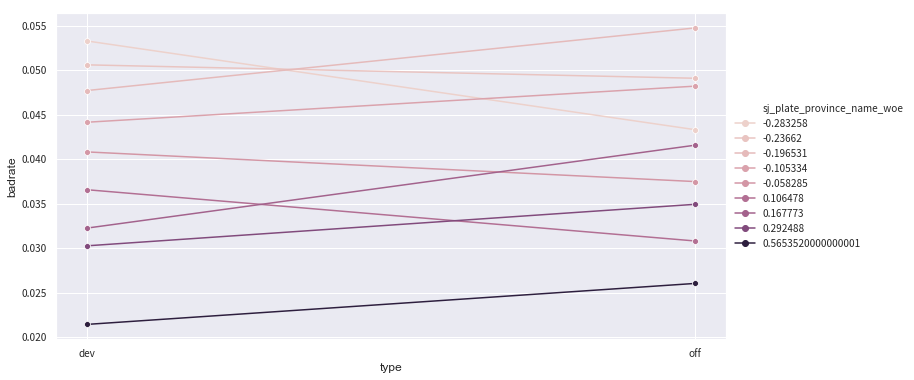

In [27]:
#分箱
data_c1 = combiner.transform(data,labels=True)
#分箱后再次观察
from toad.plot import proportion_plot,badrate_plot,bin_plot
badrate_plot(data, x='type', target='bg_result_compensate', by='sj_plate_province_name_woe')

#bin_plot(dev_slct3,x='setupHourresidentAddr',target='bg_result_compensate')
#bin_plot(off3,x='setupHourresidentAddr',target='bg_result_compensate')

In [12]:
#查看单箱节点
bins['sj_plate_province_name_woe']

[-0.196531, -0.105334, -0.058285, 0.106478, 0.167773, 0.5653520000000001]

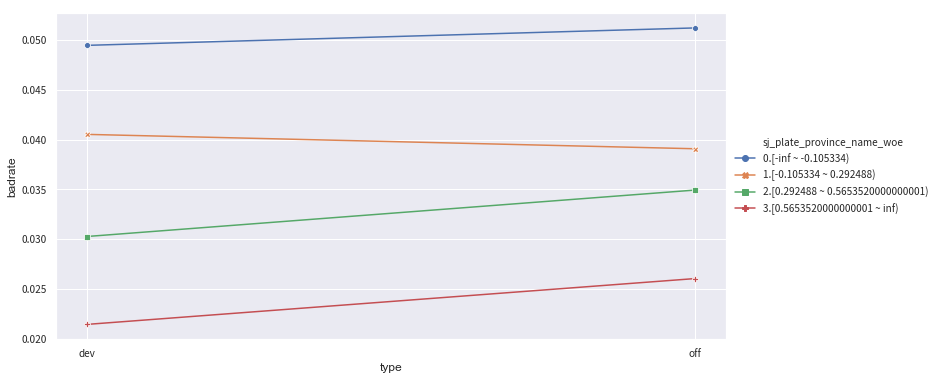

In [13]:
adj_bin = {'sj_plate_province_name_woe': [ -0.105334,0.292488, 0.5653520000000001]}
combiner.set_rules(adj_bin)
#分箱
data_c2 = combiner.transform(data,labels=True)

#分箱后再次观察
badrate_plot(data_c2, x='type', target='bg_result_compensate', by='sj_plate_province_name_woe')

In [14]:
dev_slct4 = data_c2[data_c2.type=='dev']
off4 = data_c2[data_c2.type=='off']

b = toad.detector.detect(off4)
b

,type,size,missing,unique,mean_or_top1,std_or_top2,min_or_top3,1%_or_top4,10%_or_top5,50%_or_bottom5,75%_or_bottom4,90%_or_bottom3,99%_or_bottom2,max_or_bottom1
sj_vouch_60days_cnt,float64,38479,0.00%,34,-11.0525,40.5128,-100,-100,-100,3,8,15,32,32
hz_avg_cargo_call_times_last30d_rate,object,38479,0.00%,1,0.[-inf ~ inf):100.00%,None,None,None,None,None,None,None,None,0.[-inf ~ inf):100.00%
sj_vouch_60days,float64,38479,0.00%,28,-11.6298,40.1218,-100,-100,-100,3,8,13,26,26
sj_view_30days_cnt,object,38479,0.00%,5,0.[-inf ~ 205.0):40.80%,3.[609.0 ~ 1370.0):19.78%,1.[205.0 ~ 387.0):16.84%,2.[387.0 ~ 609.0):13.60%,4.[1370.0 ~ inf):8.97%,0.[-inf ~ 205.0):40.80%,3.[609.0 ~ 1370.0):19.78%,1.[205.0 ~ 387.0):16.84%,2.[387.0 ~ 609.0):13.60%,4.[1370.0 ~ inf):8.97%
sj_plate_number_woe,object,38479,0.00%,6,4.[0.196243 ~ 0.5781689999999999):39.55%,1.[-0.212292 ~ -0.118755):19.66%,3.[-0.033749 ~ 0.196243):14.04%,0.[-inf ~ -0.212292):12.88%,2.[-0.118755 ~ -0.033749):7.99%,1.[-0.212292 ~ -0.118755):19.66%,3.[-0.033749 ~ 0.196243):14.04%,0.[-inf ~ -0.212292):12.88%,2.[-0.118755 ~ -0.033749):7.99%,5.[0.5781689999999999 ~ inf):5.88%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sj_plate_province_name_woe,object,38479,0.00%,4,1.[-0.105334 ~ 0.292488):35.57%,0.[-inf ~ -0.105334):35.10%,2.[0.292488 ~ 0.5653520000000001):17.85%,3.[0.5653520000000001 ~ inf):11.47%,None,None,1.[-0.105334 ~ 0.292488):35.57%,0.[-inf ~ -0.105334):35.10%,2.[0.292488 ~ 0.5653520000000001):17.85%,3.[0.5653520000000001 ~ inf):11.47%
bg_order_no_vouch,float64,38479,0.00%,2,1.99496e+24,2.14808e+23,-100,-100,2.01809e+24,2.01809e+24,2.01809e+24,2.01809e+24,2.01809e+24,2.01809e+24
bg_result_compensate,int64,38479,0.00%,2,0.0411133,0.198555,0,0,0,0,0,0,1,1
weight,float64,38479,0.00%,2,2.43833,0.297832,1,1,2.5,2.5,2.5,2.5,2.5,2.5


In [15]:
"""
    WOE映射
    单独将标签列
"""
t=toad.transform.WOETransformer()
dev_slct4_woe = t.fit_transform(dev_slct4,dev_slct4['bg_result_compensate'], exclude=ex_lis)
off_woe = t.transform(off4)

#concat通过参数join='inner'强制使得数据集取交集
data_woe = pd.concat([dev_slct4_woe,off_woe],join='inner')

In [28]:
"""
    计算训练集与跨时间验证集的PSIa
    删除PSI大于0.05的特征
"""

psi_df = toad.metrics.PSI(dev_slct4_woe, off_woe).sort_values(0)
psi_df = psi_df.reset_index()
psi_df = psi_df.rename(columns = {'index' : 'feature',0:'psi'})

psi05 = list(psi_df[psi_df.psi<0.02].feature)
for i in ex_lis:
    if i in psi05:
        pass
    else:
       psi05.append(i) 
print(psi05)
data_woe_psi = data_woe[psi05]  
dev_woe_psi = dev_slct4_woe[psi05]
off_woe_psi = off_woe[psi05]

['si_late_28_oil_mass', 'sj_late_28_gas_amt', 'si_avg_gas_amt', 'si_avg_28_gas_amt', 'si_max_gas_amt', 'si_total_gas_cnt', 'si_late_28_gas_cnt', 'si_day_avg_gas_cnt', 'si_total_oil_mass', 'si_avg_gas_oil_mass', 'si_avg_28_gas_oil_mass', 'si_total_gross_income', 'si_late_28_gross_income', 'si_avg_gross_income', 'sj_total_gas_amt', 'si_avg_28_gross_income', 'si_zh_gas_cnt', 'si_kp_gas_cnt', 'si_qz_gas_cnt', 'si_my_gas_cnt', 'si_qt_gas_cnt', 'si_coupon_amt', 'si_last_365_gas_cnt', 'si_dau1_30d', 'si_late_60_pau_gas_cnt', 'si_total_prize_price', 'si_no_user_prize_price', 'si_outdate_prize_price', 'hz_domain_id', 'si_refund_order_cnt', 'sj_gas_last_first_day', 'type', 'hz_avg_cargo_call_times_last30d_rate', 'bg_result_compensate', 'weight', 'sj_vehicle_type_woe', 'sj_card_name_woe', 'hz_vehicle_type_name_woe', 'hz_30_days_cnt_compensate_rate', 'sj_7day_register_woe', 'sj_30day_register_woe', 'sj_plate_province_name_woe', 'sj_etc_open_woe', 'hz_30_days_cnt_vouch_consignor', 'sj_loan_7amounts

In [29]:
"""
    再次通过信息量，相关系数进行特征筛选
"""
dev_woe_psi2, drop_lst= toad.selection.select(dev_woe_psi,dev_woe_psi['bg_result_compensate'], empty = 0.6, 
                                           iv = 0.02, corr = 0.85, return_drop=True, exclude=ex_lis)
print("keep:",dev_woe_psi2.shape[1],
      "drop empty:",len(drop_lst['empty']),
      "drop iv:",len(drop_lst['iv']),
      "drop corr:",len(drop_lst['corr']))

data_woe_psi2 = pd.concat([dev_woe_psi2,off_woe_psi],join='inner')
print(data_woe_psi2.columns)

keep: 35 drop empty: 0 drop iv: 44 drop corr: 13
Index(['type', 'bg_result_compensate', 'weight', 'sj_vehicle_type_woe',
       'sj_card_name_woe', 'hz_vehicle_type_name_woe',
       'hz_30_days_cnt_compensate_rate', 'sj_plate_province_name_woe',
       'sj_etc_open_woe', 'hz_90_days_cnt_compensate_rate',
       'sj_plate_number_woe', 'hz_60_days_cnt_compensate_suceess',
       'hz_30_days_cnt_cargo_compensate', 'sj_vouch_30days_cnt',
       'sj_vouch_90days', 'sj_all_loan_cnts', 'hz_30_days_cnt_cargo_fis_amt',
       'sj_total_credit_time', 'sj_etcconsum_30day_cnts', 'sj_all_repay_cnts',
       'bg_order_no_vouch', 'sj_etcconsum_30day_amount',
       'sj_etcconsum_all_cnts', 'hz_60_days_cnt_cargo_fis',
       'hz_60_days_cnt_vouch_consignor', 'hz_60_days_cnt_cargo',
       'hz_30_days_cnt_compensate_suceess_rate', 'sj_view_30days_cnt',
       'hz_60_days_cnt_compensate_suceess_rate', 'hz_90_days_cnt_cargo_fis',
       'hz_90_days_cnt_vouch_consignor', 'hz_60_days_cnt_compensate_rate',

In [18]:
"""
    逐步回归
    检验方法（criterion）：'aic' 和 'bic'
"""

dev_woe_psi_stp = toad.selection.stepwise(dev_woe_psi2,
                                          dev_woe_psi2['bg_result_compensate'],
                                          exclude = ex_lis,
                                          direction = 'both', 
                                          criterion = 'aic')

off_woe_psi_stp = off_woe_psi[dev_woe_psi_stp.columns]

data_woe_psi_stp = pd.concat([dev_woe_psi_stp,off_woe_psi_stp])
print(data_woe_psi_stp.columns)
print(ex_lis)

Index(['type', 'bg_result_compensate', 'weight', 'hz_vehicle_type_name_woe',
       'hz_30_days_cnt_compensate_rate', 'sj_7day_register_woe',
       'hz_90_days_cnt_compensate_rate', 'sj_all_loan_amounts',
       'sj_loan_7cnts', 'sj_plate_number_woe',
       'hz_60_days_cnt_compensate_suceess', 'hz_30_days_cnt_cargo_compensate',
       'sj_vouch_90days', 'sj_all_loan_cnts', 'hz_30_days_cnt_cargo_fis_amt',
       'sj_total_credit_time', 'sj_all_repay_cnts', 'bg_order_no_vouch',
       'hz_60_days_cnt_vouch_consignor',
       'hz_30_days_cnt_compensate_suceess_rate', 'sj_view_30days_cnt',
       'hz_60_days_cnt_compensate_suceess_rate', 'hz_90_days_cnt_cargo_fis',
       'hz_90_days_cnt_vouch_consignor', 'hz_60_days_cnt_compensate_rate',
       'hz_90_days_cnt_compensate_suceess_rate', 'sj_etcdst_30days_cnts',
       'sj_etc_duration', 'sj_discount_30day_cnts', 'sj_etcdst_30days_amount',
       'sj_repay_7amounts', 'sj_view_14days_cnt'],
      dtype='object')
['bg_order_no_vouch', 'bg_r

In [19]:
#模型训练
def c_train(data,dep='bg_result_compensate',exclude=None):
    from sklearn.preprocessing import StandardScaler
    std_scaler = StandardScaler()
    #变量名
    lis = list(data.columns)
    
    for i in exclude:
        lis.remove(i)

    data[lis] = std_scaler.fit_transform(data[lis])

    devv = data[data['type']=='dev']
    offf = data[data['type']=='off']
    
    x,y = devv[lis],devv[dep]
    offx,offy = offf[lis],offf[dep]

    #逻辑回归正向
    lr_model(x,y,offx,offy,0.1)

    #逻辑回归反向
    lr_model(offx,offy,x,y,0.1)
    
    #XGBoost正向
    xgb_model(x,y,offx,offy)

    #XGBoost反向
    xgb_model(offx,offy,x,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


train_ks :  0.3569920594199774
off_ks :  0.23043111402442717


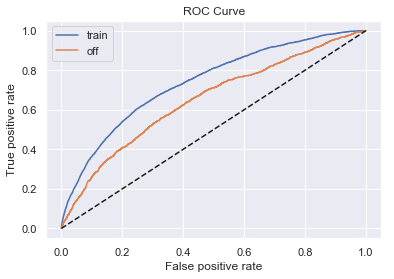

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


train_ks :  0.28826503629692896
off_ks :  0.2960143961744682


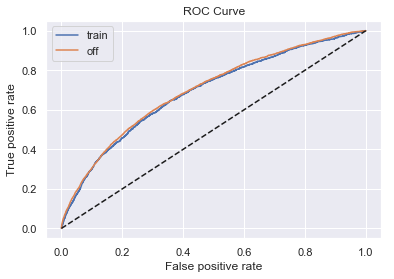

>>>>>>>>>
train_ks :  0.3748829940825548
off_ks :  0.2364792830364173


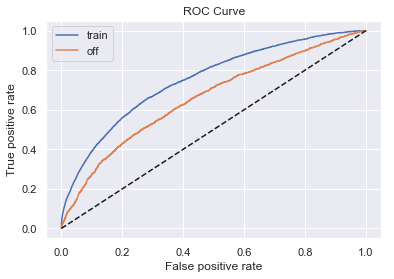

>>>>>>>>>
train_ks :  0.3393705894020691
off_ks :  0.29006059032057163


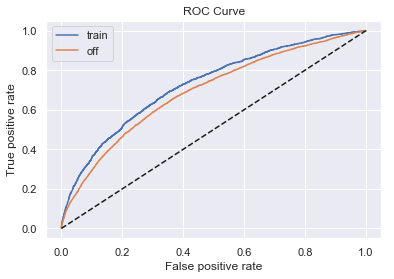

In [20]:
"""
    测试特征交叉是否有必要
    两模型KS接近代表特征交叉对模型没有明显提升   
"""
c_train(data_woe_psi_stp,dep='bg_result_compensate',exclude=ex_lis)    

In [21]:
#模型训练   
dep = 'bg_result_compensate'
lis = list(data_woe_psi_stp.columns)
for i in ex_lis:
    lis.remove(i)
    
devv = data_woe_psi_stp[data_woe_psi_stp['type']=='dev']
offf = data_woe_psi_stp[data_woe_psi_stp['type']=='off']

x,y = devv[lis],devv[dep]
offx,offy = offf[lis],offf[dep]  
   
lr = LogisticRegression()
lr.fit(x,y)    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [22]:
"""
    分别计算
    F1分数
    KS值
    AUC值
"""    
from toad.metrics import KS, F1, AUC

prob_dev = lr.predict_proba(x)[:,1]

print('Train result')
print('F1:', F1(prob_dev,y))
print('KS:', KS(prob_dev,y))
print('AUC:', AUC(prob_dev,y))

prob_off = lr.predict_proba(offx)[:,1]

print('Test result')
print('F1:', F1(prob_off,offy))
print('KS:', KS(prob_off,offy))
print('AUC:', AUC(prob_off,offy))

Train result
F1: 0.07615999999999999
KS: 0.3555479913693535
AUC: 0.7376817080831342
Test result
F1: 0.07899927592319791
KS: 0.23571345824935763
AUC: 0.6521802398839671


In [23]:
"""
    计算模型PSI
    两个角度衡量稳定性
"""
print('模型PSI:',toad.metrics.PSI(prob_dev,prob_off))
print('特征PSI:','\n',toad.metrics.PSI(x,offx).sort_values(0))   

模型PSI: 0.020534938615796243
特征PSI: 
 hz_vehicle_type_name_woe                  0.000269
hz_30_days_cnt_compensate_rate            0.000553
sj_7day_register_woe                      0.001190
hz_90_days_cnt_compensate_rate            0.001591
sj_all_loan_amounts                       0.001618
sj_loan_7cnts                             0.001859
sj_plate_number_woe                       0.002040
hz_60_days_cnt_compensate_suceess         0.002193
hz_30_days_cnt_cargo_compensate           0.002275
sj_vouch_90days                           0.003449
sj_all_loan_cnts                          0.003714
hz_30_days_cnt_cargo_fis_amt              0.004038
sj_total_credit_time                      0.004378
sj_all_repay_cnts                         0.005725
hz_60_days_cnt_vouch_consignor            0.008332
hz_30_days_cnt_compensate_suceess_rate    0.009468
sj_view_30days_cnt                        0.009580
hz_60_days_cnt_compensate_suceess_rate    0.009598
hz_90_days_cnt_cargo_fis                  0.0

In [24]:
"""
    在跨时间测试集上
    生产模型KS报告
"""    
off_bucket = toad.metrics.KS_bucket(prob_off,offy,bucket=10,method='quantile')
off_bucket

,min,max,bads,goods,total,bad_rate,good_rate,odds,bad_prop,good_prop,cum_bads,cum_goods,cum_bads_prop,cum_goods_prop,ks
0,0.000535,0.012051,70,3778,3848,0.018191,0.981809,0.018528,0.044248,0.102393,70,3778,0.044248,0.102393,-0.058145
1,0.012058,0.016641,99,3749,3848,0.025728,0.974272,0.026407,0.062579,0.101607,169,7527,0.106827,0.204000,-0.097174
2,0.016641,0.019972,105,3743,3848,0.027287,0.972713,0.028052,0.066372,0.101445,274,11270,0.173198,0.305445,-0.132246
3,0.019972,0.022736,88,3760,3848,0.022869,0.977131,0.023404,0.055626,0.101905,362,15030,0.228824,0.407350,-0.178526
4,0.022737,0.026384,96,3751,3847,0.024955,0.975045,0.025593,0.060683,0.101661,458,18781,0.289507,0.509012,-0.219505
5,0.026384,0.031690,137,3711,3848,0.035603,0.964397,0.036917,0.086599,0.100577,595,22492,0.376106,0.609589,-0.233483
6,0.031691,0.039116,170,3678,3848,0.044179,0.955821,0.046221,0.107459,0.099683,765,26170,0.483565,0.709272,-0.225707
7,0.039124,0.052029,178,3670,3848,0.046258,0.953742,0.048501,0.112516,0.099466,943,29840,0.596081,0.808738,-0.212657
8,0.052034,0.080568,243,3605,3848,0.063150,0.936850,0.067406,0.153603,0.097704,1186,33445,0.749684,0.906442,-0.156758
9,0.080596,0.762420,396,3452,3848,0.102911,0.897089,0.114716,0.250316,0.093558,1582,36897,1.000000,1.000000,0.000000


In [ ]:
"""
    生产评分卡
    对最终变量收集WOE映射信息
"""
transer = toad.transform.WOETransformer()
transer.fit_transform(devv,devv['target'],exclude=ex_lis)

card = toad.scorecard.ScoreCard(combiner = combiner, transer = transer, model = lr)
final_card = card.export()

df = pd.DataFrame()
key = set(final_card.keys())
for name in key:   
    for r,v in final_card[name].items():
        dic={}
        dic['feature'] = name 
        dic['range'] = r
        dic['score'] = v
        dt = pd.DataFrame(dic,index=[0])
        if df is None:
            df=dt
        else:
            df=df.append(dt)
        dict.clear()
df